In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import json
import cv2
import numpy as np
from PIL import Image


In [2]:
import json
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory where your files are stored
src_dir = './data/soyjoy_raw'

# Function to crop image using polygon
def crop_polygon(image, polygon):
    # Create a mask from the polygon
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    points = np.array(polygon, dtype=np.int32)
    cv2.fillPoly(mask, [points], 255)

    # Extract the bounding box
    rect = cv2.boundingRect(points)
    x, y, w, h = rect

    # Crop the bounding region
    cropped = image[y:y+h, x:x+w]

    # Apply mask to the cropped region
    mask_cropped = mask[y:y+h, x:x+w]
    result = cv2.bitwise_and(cropped, cropped, mask=mask_cropped)

    return result

# Loop through all JSON files and corresponding images in the directory
for filename in os.listdir(src_dir):
    
    if filename.endswith('.json'):
        # Load JSON data
        json_file = os.path.join(src_dir, filename)
        with open(json_file) as f:
            data = json.load(f)

        # Get corresponding image filename
        image_filename = filename.replace('.json', '.jpg')  # Assuming image files are .jpeg
        image_path = os.path.join(src_dir, image_filename)

        # Load the image
        image = cv2.imread(image_path)
        

        # Check if image is loaded properly
        if image is None:
            print(f"Error loading image from {image_path}")
            continue

        # Dictionary to track the count of each label
        label_count = {}

        # Process each shape from the JSON data
        for shape in data['shapes']:
            label = shape['label']

            # Track the number of times a label has been used
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1

            # Generate a unique file name for each cropped image
            unique_filename = f"{filename.replace('.json', '')}_{label}_{label_count[label]}.png"
            cropped_image_path = os.path.join('./data/soyjoy_cropped', unique_filename)

            # Crop and save the image
            polygon = shape['points']
            cropped_image = crop_polygon(image, polygon)
            cv2.imwrite(cropped_image_path, cropped_image)
            print(f"Cropped region saved to {cropped_image_path}")


Cropped region saved to ./data/soyjoy_cropped\6267247567616197401_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197402_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197403_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197404_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197405_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197406_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197407_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197408_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197409_2_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197410_1_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197411_2_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197412_2_1.png
Cropped region saved to ./data/soyjoy_cropped\6267247567616197413_2_1.png
Cropped region saved to ./data/soyjoy_

In [13]:
# import os

# # Define the directory where your files are stored
# src_dir = './src'

# # Loop through all files in the directory
# for filename in os.listdir(src_dir):
#     if filename.endswith('.png'):
#         file_path = os.path.join(src_dir, filename)
        
#         # Delete the file
#         os.remove(file_path)
#         print(f"Deleted {file_path}")


Deleted ./src\photo1720756795 (1)_0_1.png
Deleted ./src\photo1720756795 (1)_0_2.png
Deleted ./src\photo1720756795 (1)_0_3.png
Deleted ./src\photo1720756795 (1)_1_1.png
Deleted ./src\photo1720756795 (1)_1_2.png
Deleted ./src\photo1720756795 (1)_2_1.png
Deleted ./src\photo1720756795 (1)_2_2.png
Deleted ./src\photo1720756795 (1)_2_3.png
Deleted ./src\photo1720756795 (1)_3_1.png
Deleted ./src\photo1720756795 (1)_5_1.png
Deleted ./src\photo1720756795 (1)_6_1.png
Deleted ./src\photo1720756795 (1)_K_1.png
Deleted ./src\photo1720756795 (10)_0_1.png
Deleted ./src\photo1720756795 (10)_0_2.png
Deleted ./src\photo1720756795 (10)_1_1.png
Deleted ./src\photo1720756795 (10)_1_2.png
Deleted ./src\photo1720756795 (10)_2_1.png
Deleted ./src\photo1720756795 (10)_2_2.png
Deleted ./src\photo1720756795 (10)_2_3.png
Deleted ./src\photo1720756795 (10)_2_4.png
Deleted ./src\photo1720756795 (10)_2_5.png
Deleted ./src\photo1720756795 (10)_5_1.png
Deleted ./src\photo1720756795 (10)_9_1.png
Deleted ./src\photo1720

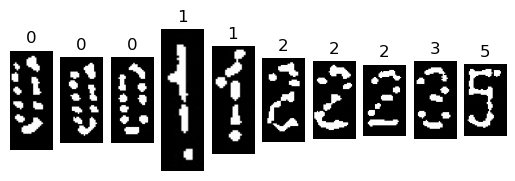

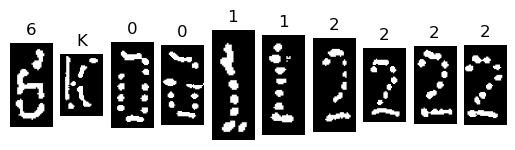

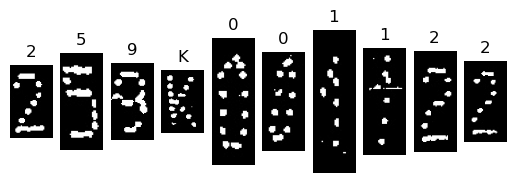

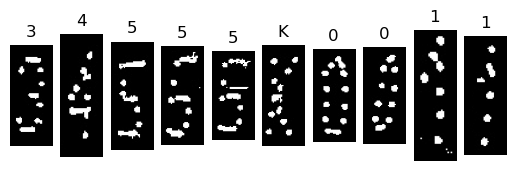

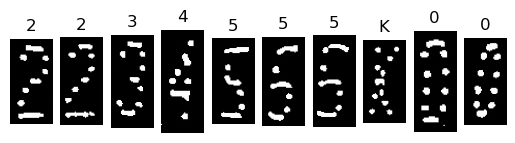

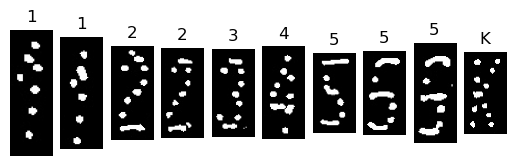

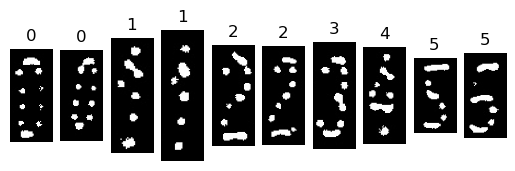

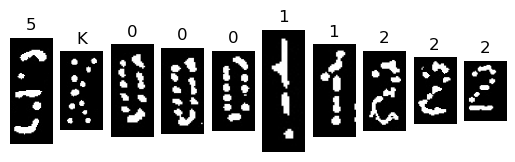

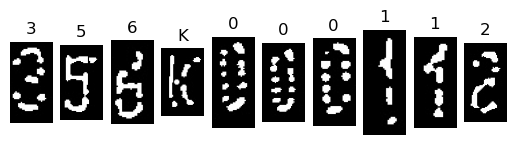

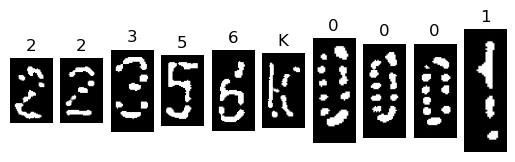

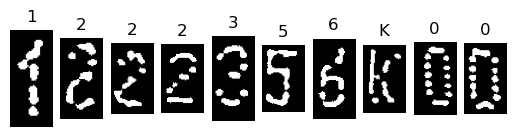

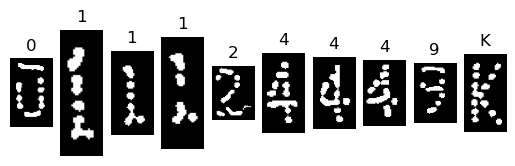

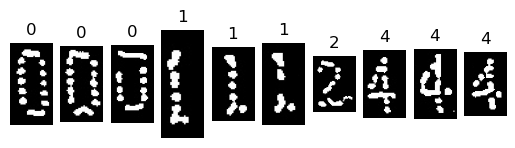

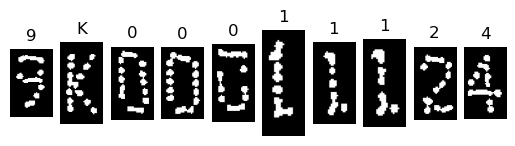

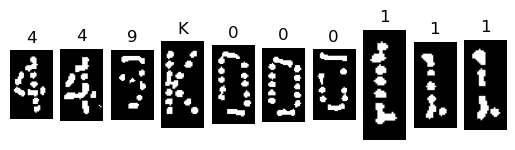

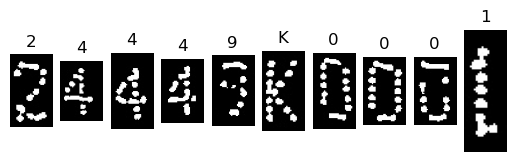

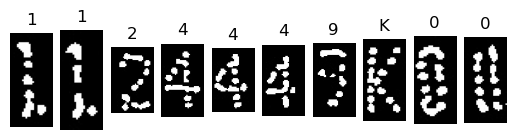

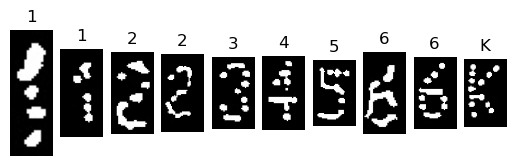

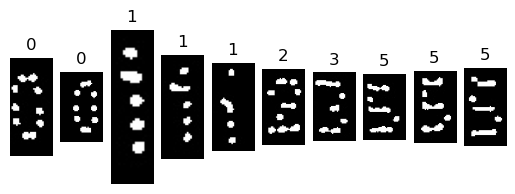

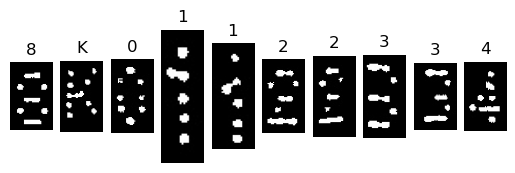

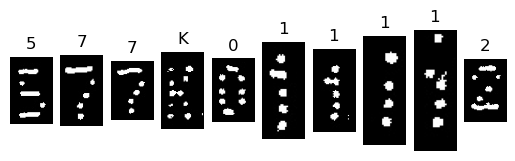

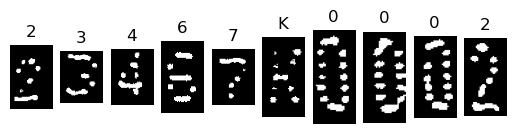

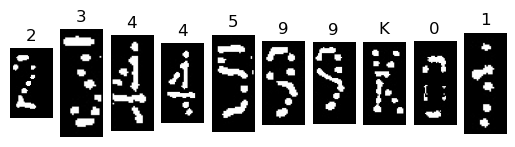

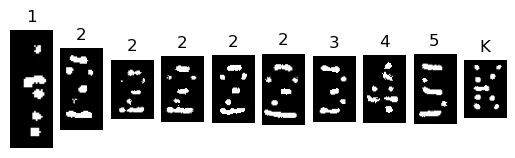

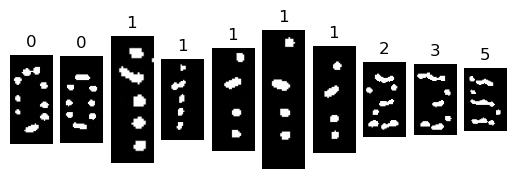

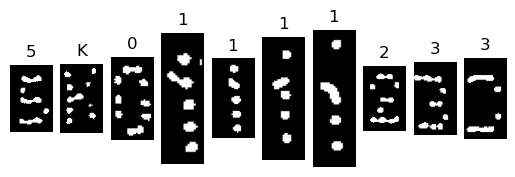

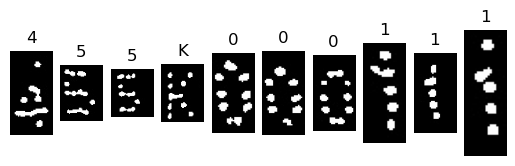

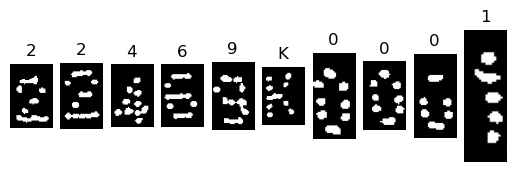

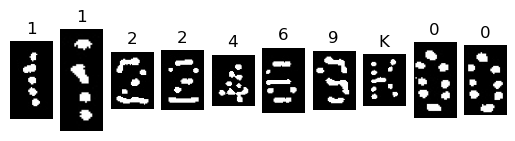

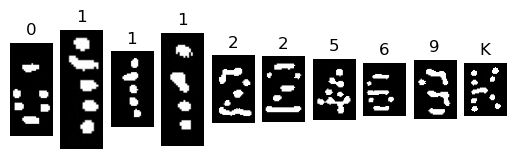

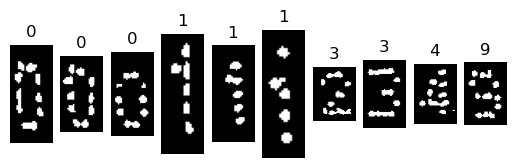

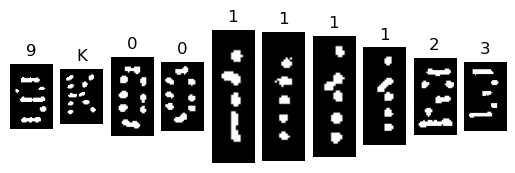

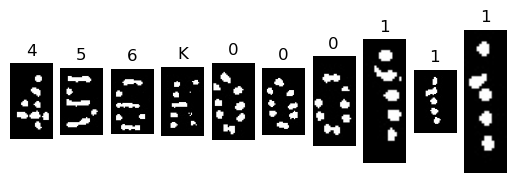

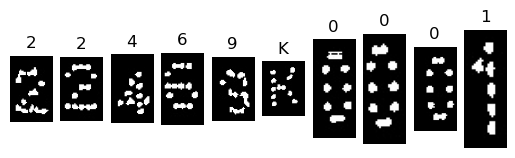

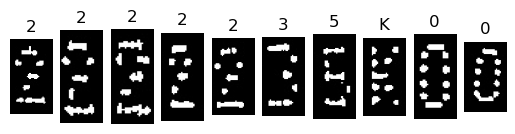

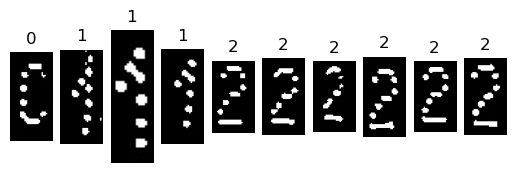

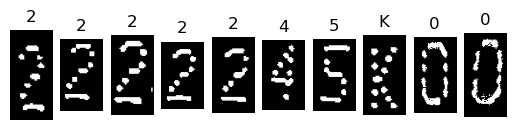

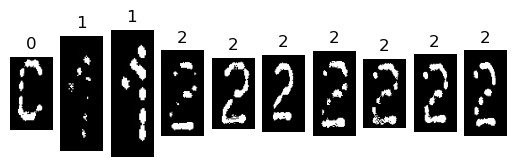

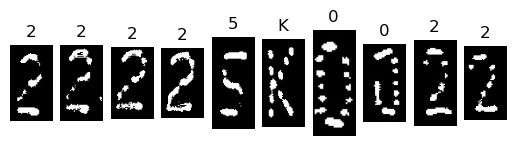

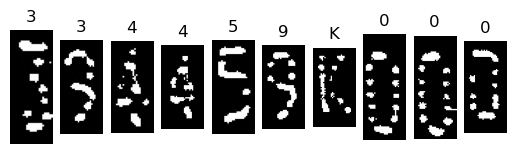

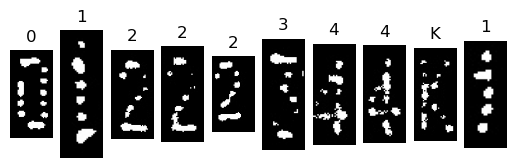

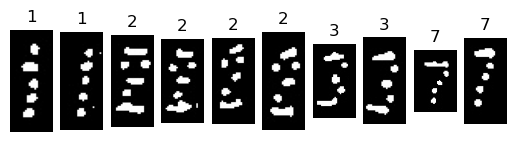

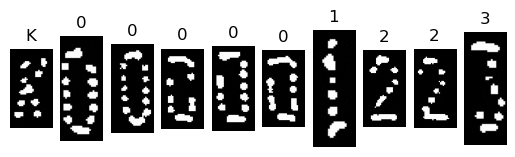

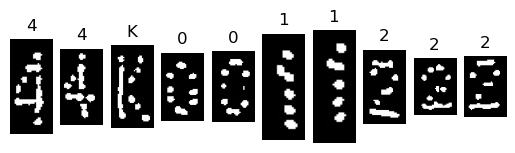

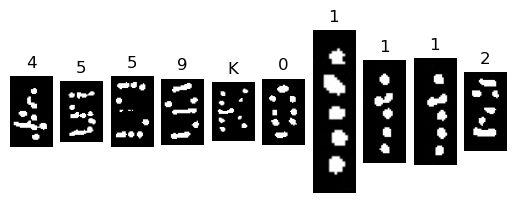

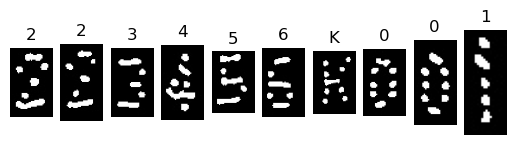

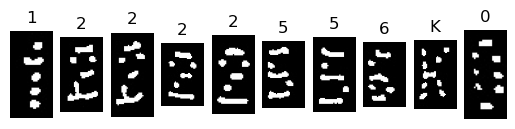

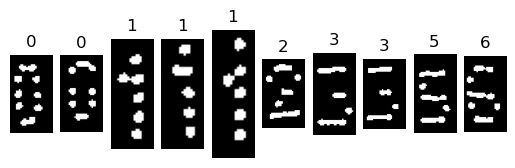

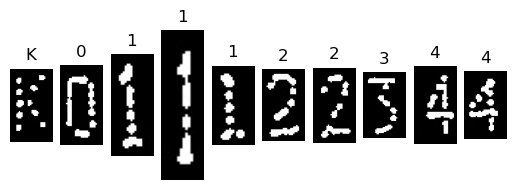

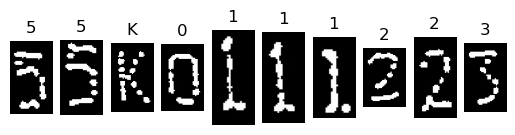

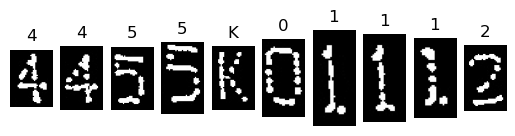

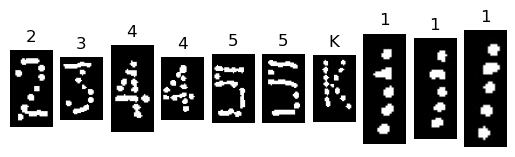

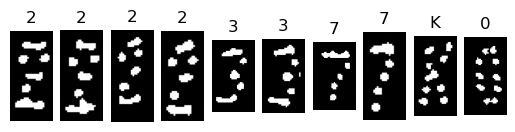

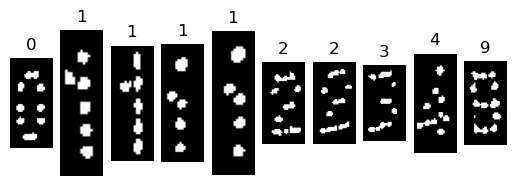

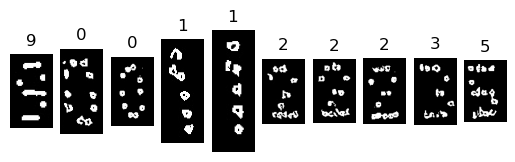

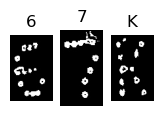

In [24]:
import os
import matplotlib.pyplot as plt

processed = "./processed"

processed_files = os.listdir(processed)

count = 0

show_per_row = 10

# plot with label from processed filename.split('_')[1]
for i, filename in enumerate(processed_files):
    # show with plt figure, one row contain 5 images
    plt.subplot(1, show_per_row, count+1)
    img = Image.open(os.path.join(processed, filename))
    plt.imshow(img)
    plt.axis('off')
    true_filename = filename.split('_')[-2]
    plt.title(true_filename)
    count += 1
    if count == show_per_row:
        plt.show()
        count = 0
        
    


In [25]:
# equelize the image into 100 x 100, if it is lack of pixel, add padding
def equelize_image(image, size=(100, 100)):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    if h > w:
        new_h = size[0]
        new_w = int(w * new_h / h)
    else:
        new_w = size[1]
        new_h = int(h * new_w / w)
    img = cv2.resize(img, (new_w, new_h))
    delta_w = size[1] - new_w
    delta_h = size[0] - new_h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = 0
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_img


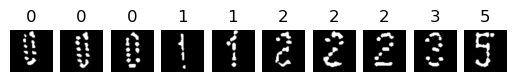

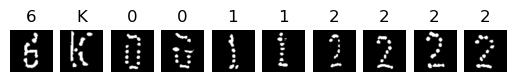

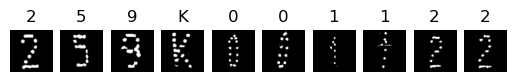

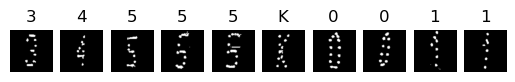

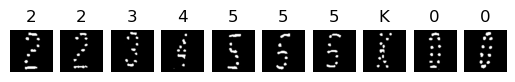

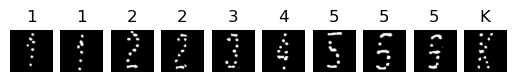

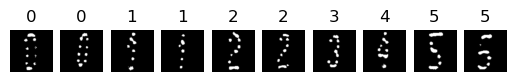

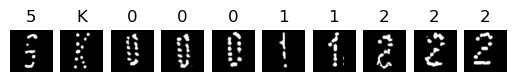

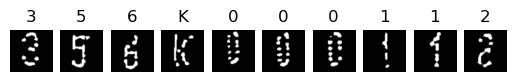

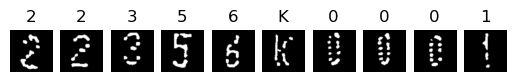

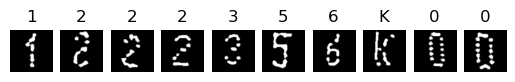

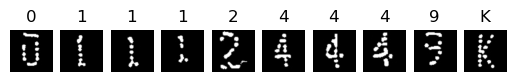

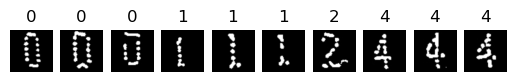

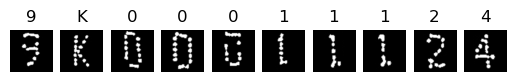

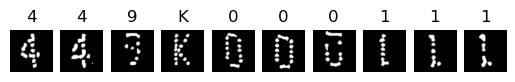

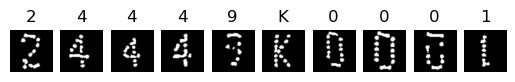

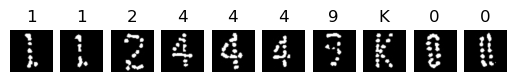

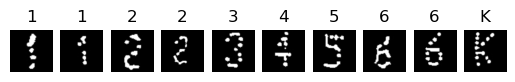

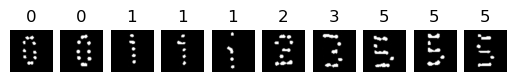

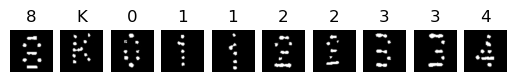

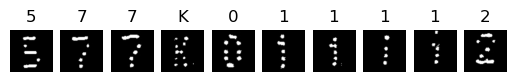

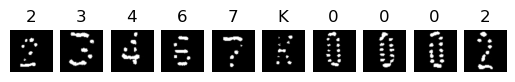

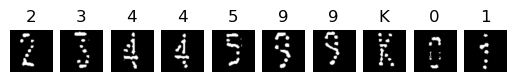

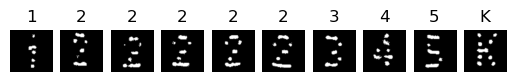

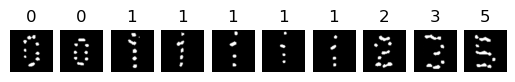

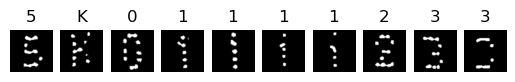

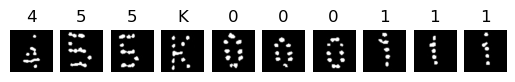

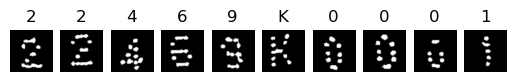

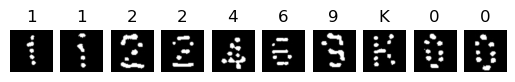

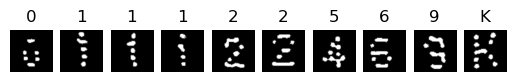

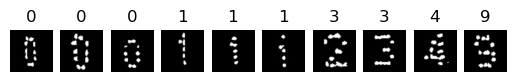

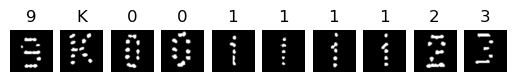

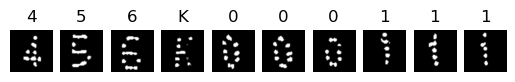

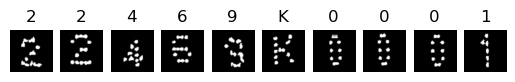

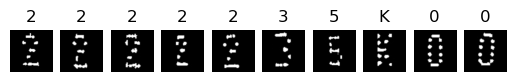

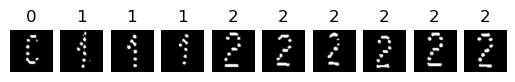

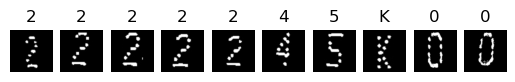

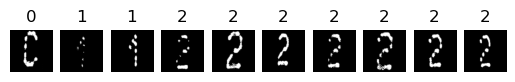

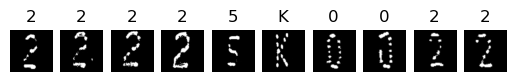

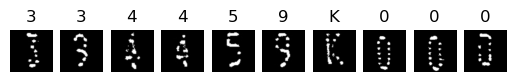

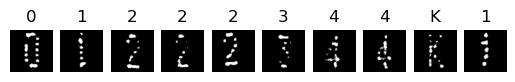

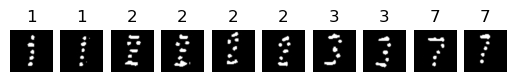

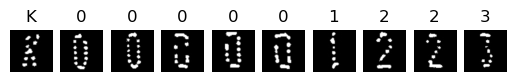

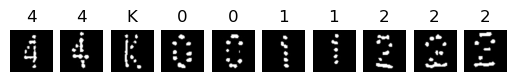

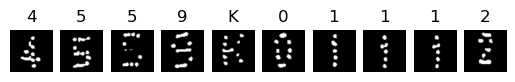

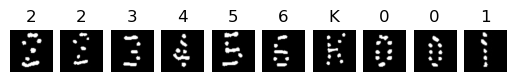

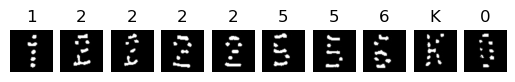

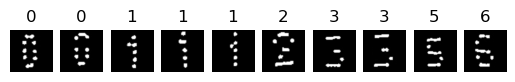

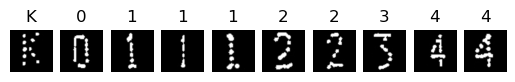

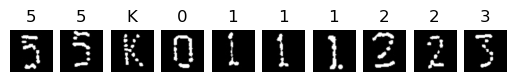

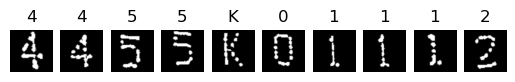

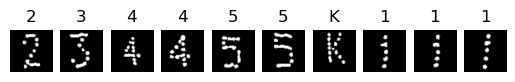

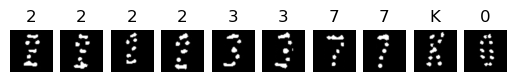

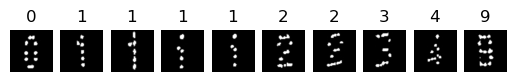

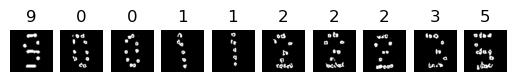

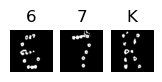

In [26]:
processed = "./processed"

processed_files = os.listdir(processed)

count = 0

show_per_row = 10

# plot with label from processed filename.split('_')[1]
for i, filename in enumerate(processed_files):
    # show with plt figure, one row contain 5 images
    plt.subplot(1, show_per_row, count+1)
    img = Image.open(os.path.join(processed, filename))
    img = np.array(img)
    img = equelize_image(img,size=(128,128))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    true_filename = filename.split('_')[-2]
    plt.title(true_filename)
    count += 1
    if count == show_per_row:
        plt.show()
        count = 0

In [27]:
import os
import numpy as np
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
# Parameters
img_size = (128, 128)  # Resize images to this size

# List of image paths and labels
image_paths = []
labels = []

processed = "./processed"

processed_files = os.listdir(processed)

# Function to preprocess and load image
def load_and_preprocess_image(image_path, size):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = np.array(img)
    img = cv2.resize(img, size)  # Resize image
    img = img.astype('float32') / 255.0  # Normalize to [0, 1]
    return img
  
# Loop through all files in the processed directory
for filename in processed_files:
    if filename.endswith('.png'):
        label = filename.split('_')[-2]  # Extract label from filename
        image_path = os.path.join(processed, filename)
        
        img = load_and_preprocess_image(image_path, img_size)
        
        # Append to lists
        image_paths.append(img)
        labels.append(label)

# Convert lists to numpy arrays
X = np.array(image_paths)
y = np.array(labels)

# Ensure labels are in integer format if required
# You may need to encode labels depending on your use case
unique_labels, y = np.unique(y, return_inverse=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save or use the data as needed
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Number of classes:", len(unique_labels))

Training data shape: (442, 128, 128)
Testing data shape: (111, 128, 128)
Number of classes: 11


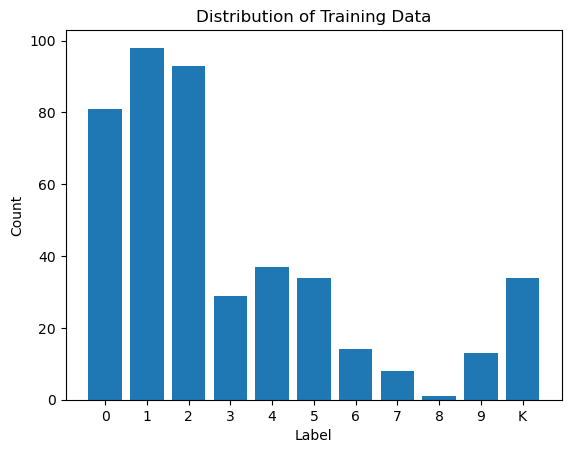

In [51]:
# counter
from collections import Counter

# plot the distribution of the data
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
plt.xticks(np.arange(len(unique_labels)), unique_labels)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Training Data')
plt.show()



In [28]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [29]:
# convert the images into 3 channels
X_train = np.dstack([X_train] * 3)
X_test = np.dstack([X_test] * 3)
X_train.shape,X_test.shape

((442, 128, 384), (111, 128, 384))

In [30]:
# reshape image as per the tensor format required by tensorflow
X_train = X_train.reshape(-1, 128,128,3)
X_test = X_test.reshape(-1, 128,128,3)
X_train.shape,X_test.shape

((442, 128, 128, 3), (111, 128, 128, 3))

In [31]:
# Resize the images 48*48 as required by VGG16

X_train = np.asarray([image.img_to_array(image.array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([image.img_to_array(image.array_to_img(im, scale=False).resize((48,48))) for im in X_test])

X_train.shape,X_test.shape

((442, 48, 48, 3), (111, 48, 48, 3))

In [32]:
# preparing data

x = X_train
y = y_train

test_images = X_test  
test_images_Original = X_test
test_image_label = y_test

val_image = X_test
val_image_Original = X_test
val_image_label = y_test

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [33]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_image=np.array(val_image) 
print(val_image.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(442, 48, 48, 3)
(442, 11)
Test Dataset
(111, 48, 48, 3)
(111, 11)
Validation Dataset
(111, 48, 48, 3)
(111, 11)


In [34]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.



Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:

# Transfer Learning

# Importing the VGG16 model
from tensorflow.keras.applications import VGG16

# Initializing the VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freezing all layers in the base model
for layer in base_model.layers:
    layer.trainable = False
    
# Adding custom layers on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model

history = model.fit(x, y, epochs=100, batch_size=32, validation_data=(val_image, val_image_label))

# Evaluate the model

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_image_label)
print("Test Accuracy:", accuracy)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │        11,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,251,275 (58.18 MB)

 Trainable params: 536,587 (2.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 467ms/step - accuracy: 0.1894 - loss: 2.2811 - val_accuracy: 0.3784 - val_loss: 1.9039
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.3316 - loss: 1.9010 - val_accuracy: 0.3153 - val_loss: 1.9179
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.3885 - loss: 1.8123 - val_accuracy: 0.3874 - val_loss: 1.7692
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 0.4537 - loss: 1.6390 - val_accuracy: 0.3964 - val_loss: 1.6641
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.4480 - loss: 1.6221 - val_accuracy: 0.4144 - val_loss: 1.6533
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.4751 - loss: 1.5058 - val_accuracy: 0.3964 - val_loss: 1.6082
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.4613 - loss: 1.5156 - val_accuracy: 0.4234 - val_loss: 1.5795
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.5169 - loss: 1.3970 - val_ac

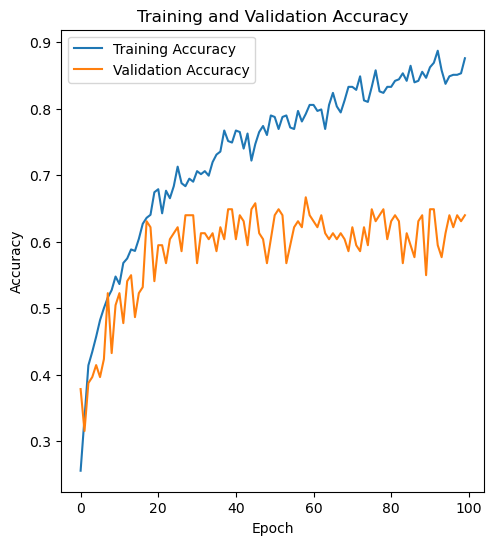

In [37]:
# plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [45]:
# try to predict the output
# Predict the labels for the test images
predictions = model.predict(test_images)

# Get the predicted class with the highest probability for each image
predicted_labels = np.argmax(predictions, axis=1)

# Display the true and predicted labels for the first few images
for i in range(10):
    print(f"True Label: {unique_labels[test_image_label[i].argmax()]} - Predicted Label: {unique_labels[predicted_labels[i]]}")
    

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step
True Label: 3 - Predicted Label: 2
True Label: 6 - Predicted Label: 0
True Label: 2 - Predicted Label: 0
True Label: 4 - Predicted Label: 1
True Label: 0 - Predicted Label: 0
True Label: 0 - Predicted Label: 2
True Label: K - Predicted Label: 1
True Label: 2 - Predicted Label: 1
True Label: K - Predicted Label: K
True Label: 4 - Predicted Label: 4


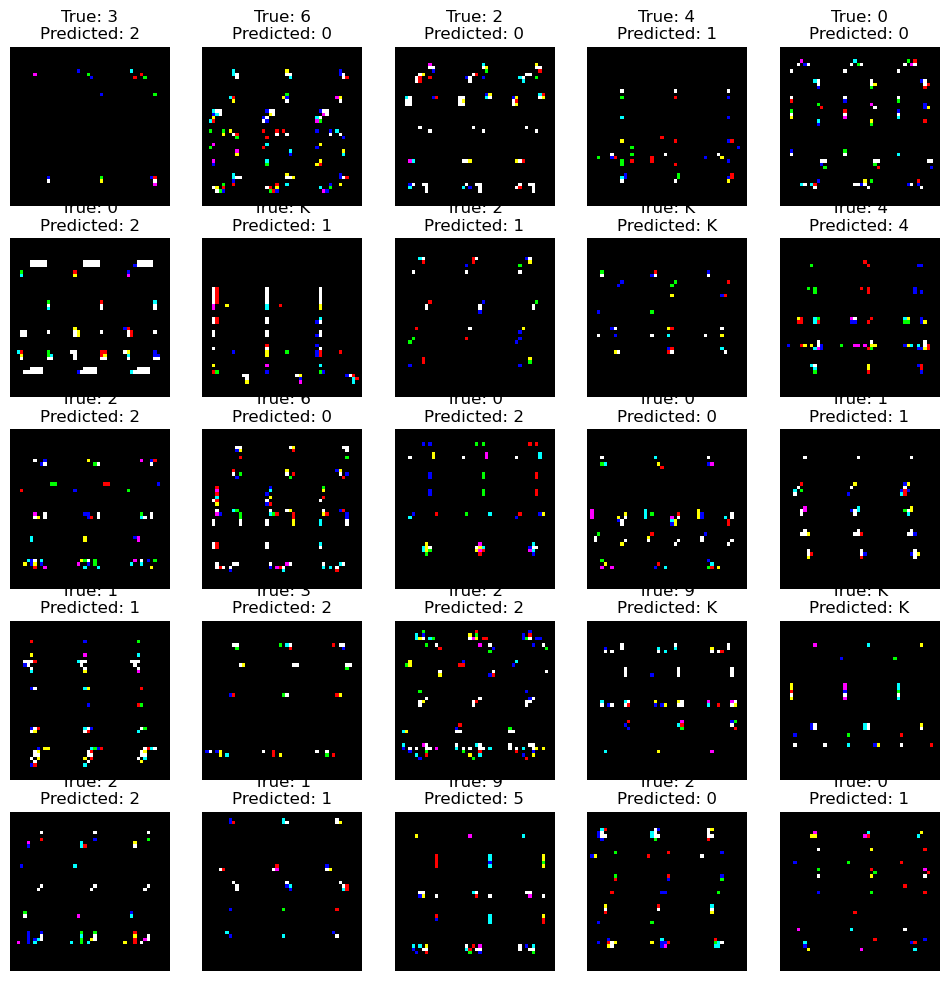

In [47]:
# plot images with their predicted labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_Original[i])
    plt.axis('off')
    plt.title(f"True: {unique_labels[test_image_label[i].argmax()]}\nPredicted: {unique_labels[predicted_labels[i]]}")
plt.show()